In [2]:
import numpy as np
import pandas as pd
import os
import pathlib
import matplotlib.pyplot as plt
from bvhpython.bvh import Bvh
from scipy.interpolate import interp1d
import os
import tensorflow as tf
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM, Dropout
from keras.layers.normalization import BatchNormalization
from keras.losses import SparseCategoricalCrossentropy, mse, CategoricalCrossentropy 
from keras.activations import relu
import datetime
from sklearn.metrics import confusion_matrix

%run Gestion_temps.ipynb

%run Gestion_temps.ipynb
%run modelisation.ipynb
%run bvh_extract.ipynb
%run algo_genetique.ipynb
%load_ext tensorboard

C:\Users\pierr\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\pierr\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\pierr\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\pierr\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [3]:
%run bvh_extract.ipynb
bde = bvh_data_extract(r'data/cmu/cmu-mocap-index-spreadsheet.xls', 5000, 132)
bde.extract_database()

cat utilisee : run
nb mvt 20
cat utilisee : salsa dance
nb mvt 30
cat utilisee : walk
nb mvt 26


In [4]:
train_db = (0,20)
test_db = (0,20)
(x_train, y_train, x_test, y_test) = bde.create_database(train_db, test_db)

x_train /= np.amax(x_train)
x_test /= np.amax(x_test)

x_train.shape

Nombre de catégorie : 3


(60, 132, 5000)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 132, 60)           1214640   
_________________________________________________________________
lstm_4 (LSTM)                (None, 30)                10920     
_________________________________________________________________
batch_normalization_3 (Batch (None, 30)                120       
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 30)                120       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 93        
Total params: 1,225,893
Trainable params: 1,225,773
Non-trainable params: 120
__________________________________________

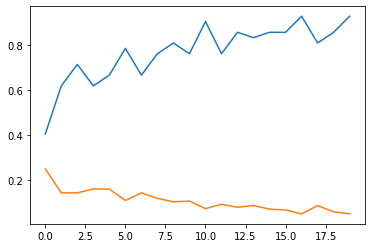

In [6]:
%run modelisation.ipynb
md = motion_detection()

md.start('cmu', x_train, 
                y_train, 
                x_test, 
                y_test, 
                (60,30),
                0.001, 
                20, 
                20,
                0.5,
                "tanh", 
                20, 
                0)


In [81]:
print(md.history.history['accuracy'])
print(md.history.history['loss'])

[0.45, 0.65]
[0.2527200825512409, 0.23901651948690414]


Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_59 (LSTM)               (None, 132, 140)          1198960   
_________________________________________________________________
batch_normalization_24 (Batc (None, 132, 140)          560       
_________________________________________________________________
lstm_60 (LSTM)               (None, 30)                20520     
_________________________________________________________________
dense_30 (Dense)             (None, 4)                 124       
Total params: 1,220,164
Trainable params: 1,219,884
Non-trainable params: 280
_________________________________________________________________
None
Epoch 1/31
Epoch 2/31
Epoch 3/31
Epoch 4/31
Epoch 5/31
Epoch 6/31
Epoch 7/31
Epoch 8/31
Epoch 9/31
Epoch 10/31
Epoch 11/31
Epoch 12/31
Epoch 13/31
Epoch 14/31
Epoch 15/31
Epoch 16/31
Epoch 17/31
Epoch 18/31
Epoch 19/31
Epoch 20/31
Epo

KeyboardInterrupt: 

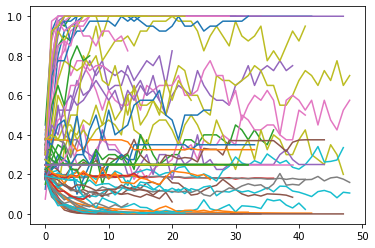

In [61]:
%run algo_genetique.ipynb

t = test('cmu', x_train, y_train, x_test, y_test)
t.start(10)

In [45]:
# slide 29
# test neurons
start = 20
end = 400
pas = 20

results = np.zeros((1,2))

for i in range(start, end, pas):
    md = motion_detection('data', x_train, y_train, x_test, y_test, i, 0.00015, 10, 1, "selu", 1, 0)
    md.start()
    print("occ :",i," results :", md.results)
    results = np.vstack([results,md.results])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_53 (LSTM)               (None, 132, 20)           41680     
_________________________________________________________________
lstm_54 (LSTM)               (None, 132, 30)           6120      
_________________________________________________________________
dropout_25 (Dropout)         (None, 132, 30)           0         
_________________________________________________________________
lstm_55 (LSTM)               (None, 132, 30)           7320      
_________________________________________________________________
dropout_26 (Dropout)         (None, 132, 30)           0         
_________________________________________________________________
lstm_56 (LSTM)               (None, 30)                7320      
_________________________

KeyboardInterrupt: 

In [ ]:
# graphic
# number of neuron in relation to acc and loss
tab_nb = range(start, end, pas)

plt.plot(tab_nb, results[1:,0], 'r-', label="loss")
plt.plot(tab_nb, results[1:,1], 'g-', label="acc")
plt.ylabel("Rate")
plt.xlabel("neurons")
plt.legend()

In [ ]:
# slide 30
# test epcohs
start = 1
end = 100
pas = 10

results = np.zeros((1,2))

for i in range(start, end, pas):
    md = motion_detection('data', x_train, y_train, x_test, y_test, 100, 0.0001, i, 1, "relu", 1, 0)
    md.start()
    print("occ :",i," results :", md.results)
    results = np.vstack([results,md.results])


In [ ]:
# graphic
# number of neuron in relation to acc and loss
tab_nb_neurons = range(start, end, pas)

plt.plot(tab_nb_neurons, results[1:,0], 'r-', label="loss")
plt.plot(tab_nb_neurons, results[1:,1], 'g-', label="acc")
plt.ylabel("Rate")
plt.xlabel("epochs")
plt.legend()

In [ ]:
# slide 30
# test bs
start = 1
end = 32
pas = 2

results = np.zeros((1,2))

for i in range(start, end, pas):
    md = motion_detection('cmu', x_train, y_train, x_test, y_test, 100, 0.000015, 50, i, "tanh", 1, 0)
    md.start()
    print("occ :",i," results :", md.results)
    results = np.vstack([results,md.results])


In [ ]:
# graphic
# number of neuron in relation to acc and loss
tab_nb = range(start, end, pas)

plt.plot(tab_nb, results[1:,0], 'r-', label="loss")
plt.plot(tab_nb, results[1:,1], 'g-', label="acc")
plt.ylabel("Rate")
plt.xlabel("batch_size")
plt.legend()

In [79]:
f = open("data/Florence_dataset_WorldCoordinates.txt")
tmp = np.genfromtxt(f, delimiter=' ')
mvt = np.array(tmp)

In [20]:
# unique contains all of the video id
# counts contains the number of occurence of each video id
unique, counts = np.unique(mvt[:,0], return_counts=True)

# allow to know the max number of frame of all mvt
nb_frame_max = max(counts)
nb_frame_max

NameError: name 'mvt' is not defined

[-222.73712158 -222.75411987 -221.25302124 -220.48362732 -221.1158905
 -219.50312805 -219.40139771 -219.58151245 -218.80999756 -218.69155884
 -218.85389709 -219.81625366 -219.39605713 -222.20172119 -221.76835632
 -222.31994629 -222.35884094 -226.20680237 -224.71310425 -223.27893066
 -224.80448914 -225.16653442 -222.4690094  -222.87828064 -221.99227905
 -222.24784851 -223.00605774]
(48, 27)
[[-222.73712158 -222.75062022 -221.87112068 ... -222.56005231
  -223.16215964 -223.76426697]
 [ 540.99542236  541.14087812  541.87449736 ...  547.03614358
   549.80707326  552.57800293]
 [2832.40991211 2830.58223949 2828.99310662 ... 2820.44297162
  2819.51701804 2818.59106445]
 ...
 [ -18.1917305   -16.74520672  -16.7386156  ...  -15.58041516
   -19.64235325  -23.70429134]
 [-930.29620361 -934.23218491 -935.40111946 ... -938.12389778
  -926.61685001 -915.10980225]
 [2827.43798828 2826.27337287 2827.4635656  ... 2858.37966739
  2863.41773897 2868.45581055]]


(45, 35)

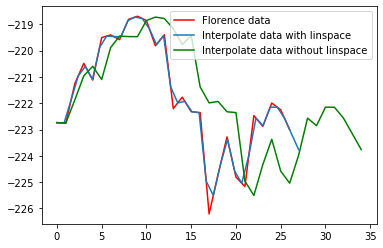

In [81]:
# Creation of the mvt data base of the Florence university

# Initialization of the mvt tab
# allow to use np.vstack() function of numpy lib
# vstack stack object of the same size

# mvts is a array of 3-column
# 1 => actor id
# 2 => category id
# 3 => mvt belonging to the two previous id's
mvts = np.array([0, 0, [[ x for x in range(nb_frame_max)] for y in range(45)]])

# browse of all id video
for n in unique:
    
    idvideo = int(n)
    
    # motion recovery
    tmp = mvt[mvt[:,0] == idvideo]
    
    # index 0 = idvideo
    # index 1 = idactor
    # index 2 = idcategory
    idcat = int(tmp[0,2])
    idactor = int(tmp[0,1])
    
    # id data removing
    tmp = tmp[:,3:]
    
    # preparing the normalized matrice
    m_n = np.zeros((nb_frame_max, 45))
    
    # nb frame of the motion
    dim_m = tmp.shape[0]
    
    i = 0
    # interpolation
    while i < tmp.shape[1]:
        f = interp1d(np.arange(dim_m), tmp[:,i], fill_value='extrapolate')
        m_n[:,i] = np.array(f(np.linspace(0, dim_m, nb_frame_max)))
        i += 1
    
    tmp = m_n
    # the mvt is transposed in order to have time-based coordinates 
    tmp = np.array([idactor, idcat, tmp.T])
    
    mvts = np.vstack([mvts, tmp])

# removing the first iteration of the mvt tab 
# which was created for vstack function
mvts = mvts[1:]

# comparision before / after
tmp = mvt[mvt[:,0] == 1].T
print(tmp[3])
print(tmp.shape)

# plot
plt.plot(tmp[3],'r-', label="Florence data")
plt.plot(np.linspace(0,27,nb_frame_max), mvts[0,2][0,:], label="Interpolate data with linspace")
plt.plot(mvts[0,2][0,:], 'g-', label="Interpolate data without linspace")
plt.legend()

print(mvts[0,2])
mvts[0,2].shape

In [82]:
# Creation of the train and test dataset

# train data contains all data except the data of actor one
tmp = mvts[mvts[:,0] != 1]
x_train = np.array([x[2] for x in tmp])
y_train = tmp[:,1]

# test data contains data of actor 1 only
tmp = mvts[mvts[:,0] == 1]
x_test =  np.array([x[2] for x in tmp])
y_test = np.array(tmp[:,1], dtype="int")


## 